Sources:
https://www.statology.org/pandas-sum-column-with-condition/

https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

https://www.geeksforgeeks.org/how-to-add-column-from-another-dataframe-in-pandas/

https://note.nkmk.me/en/python-pandas-t-transpose/

https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index/#:~:text=Pandas%20Drop%20Multiple%20Columns%20By%20Index,-In%20this%20section&text=You%20can%20use%20df.,second%20column%20and%20so%20on.

https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe

Referenced lecture 

# K to the Nearest Neighbor
This algorithm takes data from multiple groups of data sets, then estimates which group another data set might belong to. In this case, the algorithm will be analyzing 5 different literature pieces from two others (10 works in total), and two works from "mystery" authors. For our purposes, both of the mystery authors will be one from each of the previously stated authors. In total there will be 12 pieces, 6 from each author, with one "unknown" author from both.
The algorithm will estimate which author the mystery author is. 

# Meet the Authors

## Jacob Abbott
Author A is Jacob Abbott (1803-1879), an author from the United States specializing in historical figures. Three of his selected pieces are from his "Makers of History" series, focusing on Romulus, Xerxes, and Gengis Khan. One piece, in a similar vein, is about Cleopatra. The final piece is a fictional piece written for a younger audience. This author was selected becaue I assumed that his historical pieces will be written in a similiar style, making trends easy to find.

## Matthew Arnold
Author B is Matthew Arnold (1822-1888), an English poet. His selected pieces for analysis are "On Translating Homer", "Culture and Anarchy", a compilation of poems, "Celtic Literature", and "Selection from the Prose Works." While Arnold and Abbott are from a similar time period, Arnold was selected because it is assumed that he will use a different dialect of English than Abbott. Additionally, his writing style will also be different from Abbott's. 

## "Unknown" Authors

The first unknown piece will be Abbott's "Cyrus the Great Makers of History." The second unkown piece will be Arnold's "Discourses in America."

## Source of Authors' Works
The authors and their respective works were collected from Project Gutenberg. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
# Get Author 1
a1 = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/a1.csv")
a2 = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/a2.csv")
a3 = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/a3.csv")
a4 = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/a4.csv")
a5 = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/a5.csv")

# Get Author 2
b1 = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/b1.csv")
b2 = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/b2.csv")
b3 = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/b3.csv")
b4 = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/b4.csv")
b5 = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/b5.csv")

# Get unknown authors
ua = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/ua.csv")
ub = pd.read_csv("https://cs.indstate.edu/~cs50110/authors/ub.csv")

dataframes_list = [a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,ua,ub]


# Clean white spaces and add frequency
for sheet in dataframes_list:
    sheet['Word'] = sheet['Word'].str.strip()
    sheet.rename(columns = {' Frequency': 'Word Count'}, inplace = True)
    sheet['Frequency'] = sheet['Word Count']/sheet['Word Count'].sum()

# Explore Data 
a1 


,Word,Word Count,Frequency
0,the,4652,0.095246
1,and,2601,0.053253
2,was,1071,0.021928
3,his,831,0.017014
4,that,675,0.013820
...,...,...,...
6559,_her_,1,0.000020
6560,_friend_,1,0.000020
6561,_egyptian_,1,0.000020
6562,_daughter_,1,0.000020


In [3]:
# Merge Arnold, Abbott, Unknowns
df_comparison = pd.DataFrame(a1).copy()
df_comparison.rename(columns = {'Frequency': 'Abbott'}, inplace = True)
df_comparison.drop(['Word Count'], axis=1, inplace=True)

for i in dataframes_list[1:5]:
    df_comparison = pd.merge(df_comparison, (i).copy())
    df_comparison.rename(columns = {'Frequency': 'Abbott'}, inplace = True)
    df_comparison.drop(['Word Count'], axis=1, inplace=True)

for i in dataframes_list[5:10]:
    df_comparison = pd.merge(df_comparison, (i).copy())
    df_comparison.rename(columns = {'Frequency': 'Arnold'}, inplace = True)
    df_comparison.drop(['Word Count'], axis=1, inplace=True)
    
df_comparison = pd.merge(df_comparison, ua.copy(), how='outer', on='Word')
df_comparison.rename(columns = {'Frequency': 'Unknown A Frequency'}, inplace = True)
df_comparison.drop(['Word Count'], axis=1, inplace=True)

df_comparison = pd.merge(df_comparison, ub.copy(), how='outer', on='Word')
df_comparison.rename(columns = {'Frequency': 'Unknown B Frequency'}, inplace = True)
df_comparison.drop(['Word Count'], axis=1, inplace=True)

# Gets rid of rows with null value, so each work will have used each word
df_comparison = df_comparison.dropna()
df_comparison = df_comparison.reset_index(drop = True)
df_comparison = df_comparison.transpose()

# Makes first row the column name and drops first row
df_comparison = df_comparison.rename(columns=df_comparison.iloc[0])
df_comparison = df_comparison.drop(index = 'Word')
df_comparison


,the,and,was,his,that,her,which,with,for,had,...,middle,meant,meaning,lose,looks,gives,false,europe,comes,choose
Abbott,0.095246,0.053253,0.021928,0.017014,0.01382,0.012653,0.012612,0.010913,0.009684,0.009459,...,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002
Abbott,0.101282,0.055193,0.019328,0.013128,0.013281,0.004464,0.01227,0.009345,0.010313,0.009455,...,0.00011,0.000044,0.000308,0.000044,0.000022,0.000044,0.000044,0.000044,0.000044,0.000088
Abbott,0.11495,0.048639,0.020937,0.01151,0.014516,0.001718,0.01166,0.008182,0.008031,0.010114,...,0.00015,0.000064,0.000043,0.000064,0.000043,0.000043,0.000043,0.000258,0.000021,0.000086
Abbott,0.095659,0.049994,0.022361,0.020282,0.015337,0.002251,0.010468,0.010872,0.009141,0.009699,...,0.000038,0.000038,0.000038,0.000019,0.000019,0.000077,0.000077,0.000115,0.000058,0.000038
Abbott,0.088572,0.050413,0.020362,0.018335,0.015897,0.002628,0.004687,0.006998,0.008582,0.008012,...,0.000317,0.000127,0.000032,0.000127,0.00019,0.000095,0.000032,0.000063,0.000602,0.000063
Arnold,0.0695,0.033153,0.002998,0.012873,0.020143,0.000627,0.011423,0.009131,0.012011,0.001763,...,0.000059,0.000353,0.000372,0.000235,0.000118,0.000588,0.000588,0.000098,0.000549,0.00002
Arnold,0.079761,0.059324,0.003228,0.005912,0.01766,0.000188,0.013081,0.011092,0.012218,0.00167,...,0.000432,0.000206,0.000094,0.000056,0.000206,0.000282,0.000244,0.000094,0.000413,0.000056
Arnold,0.075728,0.053939,0.003953,0.011844,0.00925,0.006239,0.004586,0.011829,0.006563,0.001822,...,0.000062,0.000046,0.000031,0.000154,0.000232,0.000108,0.00034,0.000077,0.000649,0.000077
Arnold,0.09468,0.048299,0.005408,0.008364,0.012263,0.001761,0.008962,0.009842,0.010691,0.003082,...,0.000346,0.000063,0.000157,0.000094,0.000157,0.000503,0.000126,0.000283,0.000566,0.000063
Arnold,0.078835,0.049409,0.005713,0.011252,0.014753,0.002177,0.011033,0.009847,0.011149,0.002154,...,0.000564,0.000161,0.000115,0.000127,0.000092,0.00038,0.000311,0.000357,0.000484,0.000127


## Explore data 

In [4]:
df_comparison.describe()

,the,and,was,his,that,her,which,with,for,had,...,middle,meant,meaning,lose,looks,gives,false,europe,comes,choose
count,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000
unique,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000
top,0.095246,0.053253,0.021928,0.017014,0.01382,0.012653,0.012612,0.010913,0.009684,0.009459,...,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002
freq,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [5]:
df_comparison.isnull().sum()

the       0
and       0
was       0
his       0
that      0
         ..
gives     0
false     0
europe    0
comes     0
choose    0
Length: 560, dtype: int64

In [6]:
# Trim down to just 100 words
df_comparison = df_comparison.drop(df_comparison.iloc[:, 100:], axis = 1)
df_comparison.index

Index(['Abbott', 'Abbott', 'Abbott', 'Abbott', 'Abbott', 'Arnold', 'Arnold',
       'Arnold', 'Arnold', 'Arnold', 'Unknown A Frequency',
       'Unknown B Frequency'],
      dtype='object')

In [7]:
cols = list(df_comparison.columns.copy())
cols

['the',
 'and',
 'was',
 'his',
 'that',
 'her',
 'which',
 'with',
 'for',
 'had',
 'were',
 'she',
 'him',
 'this',
 'from',
 'they',
 'all',
 'not',
 'very',
 'their',
 'but',
 'time',
 'been',
 'would',
 'there',
 'them',
 'these',
 'other',
 'upon',
 'great',
 'one',
 'into',
 'made',
 'most',
 'some',
 'when',
 'have',
 'city',
 'such',
 'himself',
 'who',
 'then',
 'could',
 'any',
 'should',
 'now',
 'more',
 'under',
 'every',
 'over',
 'fact',
 'its',
 'after',
 'make',
 'power',
 'only',
 'thus',
 'against',
 'sent',
 'said',
 'might',
 'two',
 'while',
 'before',
 'people',
 'men',
 'what',
 'whole',
 'out',
 'course',
 'will',
 'where',
 'those',
 'sea',
 'life',
 'than',
 'part',
 'found',
 'between',
 'being',
 'through',
 'seemed',
 'own',
 'did',
 'too',
 'means',
 'cause',
 'are',
 'take',
 'came',
 'world',
 'certain',
 'wholly',
 'way',
 'took',
 'soon',
 'country',
 'years',
 'same',
 'man']

In [8]:
df_comparison.head()

,the,and,was,his,that,her,which,with,for,had,...,world,certain,wholly,way,took,soon,country,years,same,man
Abbott,0.095246,0.053253,0.021928,0.017014,0.01382,0.012653,0.012612,0.010913,0.009684,0.009459,...,0.000983,0.000983,0.000962,0.000962,0.000962,0.000962,0.000962,0.000942,0.000942,0.000942
Abbott,0.101282,0.055193,0.019328,0.013128,0.013281,0.004464,0.01227,0.009345,0.010313,0.009455,...,0.000594,0.00099,0.000726,0.001187,0.000858,0.001143,0.001077,0.000902,0.000814,0.000616
Abbott,0.11495,0.048639,0.020937,0.01151,0.014516,0.001718,0.01166,0.008182,0.008031,0.010114,...,0.000472,0.000666,0.000537,0.001009,0.000601,0.000859,0.001589,0.000451,0.000966,0.000752
Abbott,0.095659,0.049994,0.022361,0.020282,0.015337,0.002251,0.010468,0.010872,0.009141,0.009699,...,0.000192,0.000943,0.000423,0.002021,0.001424,0.001597,0.002867,0.000866,0.000693,0.00102
Abbott,0.088572,0.050413,0.020362,0.018335,0.015897,0.002628,0.004687,0.006998,0.008582,0.008012,...,0.000127,0.000222,0.000158,0.002502,0.001583,0.002058,0.00038,0.000127,0.000348,0.00133


In [9]:
df_comparison['the'].index

Index(['Abbott', 'Abbott', 'Abbott', 'Abbott', 'Abbott', 'Arnold', 'Arnold',
       'Arnold', 'Arnold', 'Arnold', 'Unknown A Frequency',
       'Unknown B Frequency'],
      dtype='object')

## Visualize

In [10]:
df_abbott = df_comparison.iloc[[0,1,2,3,4]].copy()
df_arnold = df_comparison.iloc[[5,6,7,8,9]].copy()
unknownA = df_comparison.iloc[[10]].copy()
unknownB = df_comparison.iloc[[11]].copy()

df_arnold

,the,and,was,his,that,her,which,with,for,had,...,world,certain,wholly,way,took,soon,country,years,same,man
Arnold,0.0695,0.033153,0.002998,0.012873,0.020143,0.000627,0.011423,0.009131,0.012011,0.001763,...,0.000549,0.000725,0.000118,0.000803,0.000098,0.000078,0.000059,0.000216,0.00145,0.001352
Arnold,0.079761,0.059324,0.003228,0.005912,0.01766,0.000188,0.013081,0.011092,0.012218,0.00167,...,0.001783,0.000525,0.000094,0.001727,0.000075,0.000188,0.000638,0.000507,0.001614,0.002571
Arnold,0.075728,0.053939,0.003953,0.011844,0.00925,0.006239,0.004586,0.011829,0.006563,0.001822,...,0.002517,0.000046,0.000124,0.001467,0.000587,0.000432,0.000293,0.000803,0.000185,0.002394
Arnold,0.09468,0.048299,0.005408,0.008364,0.012263,0.001761,0.008962,0.009842,0.010691,0.003082,...,0.001509,0.000975,0.000189,0.001415,0.000189,0.00022,0.000535,0.000503,0.000975,0.000912
Arnold,0.078835,0.049409,0.005713,0.011252,0.014753,0.002177,0.011033,0.009847,0.011149,0.002154,...,0.002062,0.000599,0.000115,0.00114,0.00023,0.000207,0.000587,0.000806,0.001037,0.002522


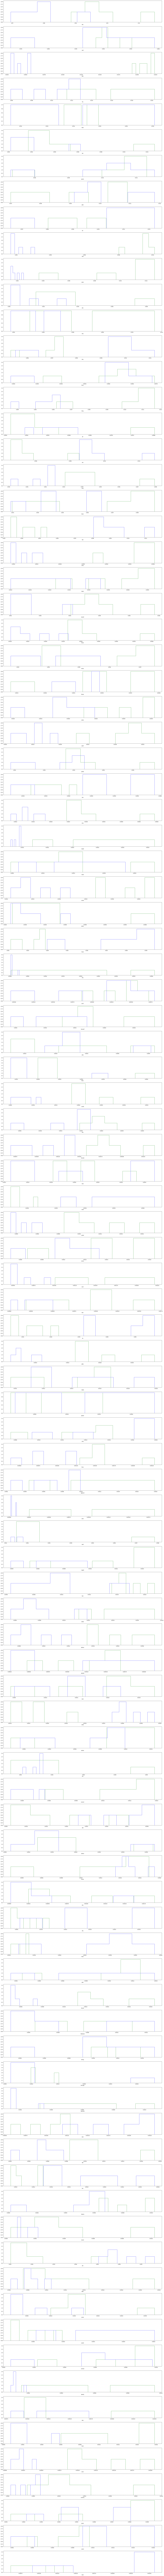

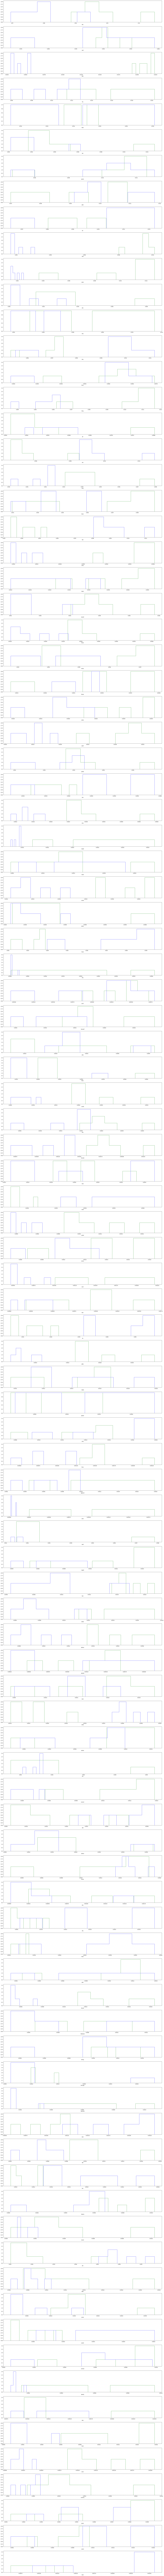

In [11]:
fig = plt.figure(figsize=(30,500))

axes = []
PT_SIZE = 1 
N_BINS = 6

for i in range(len(cols)):
    axes.append(fig.add_subplot(len(cols), 1, i+1))
    axes[i].set_xlabel(cols[i])
    axes[i].hist(df_abbott[cols[i]], N_BINS, histtype='step',stacked = True, density = False, color = 'green')
    axes[i].hist(df_arnold[cols[i]], N_BINS, histtype='step',stacked = True, density = False, color = 'blue')
    #axes[i].hist(df_comparison.iloc[[10]][cols[i]], N_BINS, histtype='step',stacked = True, density = False, color = 'red')
    #axes[i].hist(df_comparison.iloc[[11]][cols[i]], N_BINS, histtype='step',stacked = True, density = False, color = 'purple')

fig

In [12]:
select_cols = ['was','had','thus']
combs = [*combinations(select_cols, 2)]
combs

[('was', 'had'), ('was', 'thus'), ('had', 'thus')]

## Dimensions of Analysis
"thus", "had", and "was" are chosen for the dimensions of analysis. After reviewing the histograms of each word preference between Abbott and Arnold, these three words seemed to have staunchly different preferencial usage between the two. The scatter plots below show that Abbot prefers using all three words, while Arnold does not use them as much. The dimensions are normalized in the sense that we are using their frequency of usage, so it is not needed to normalize them any further. 

<bound method Figure.tight_layout of <Figure size 432x864 with 3 Axes>>

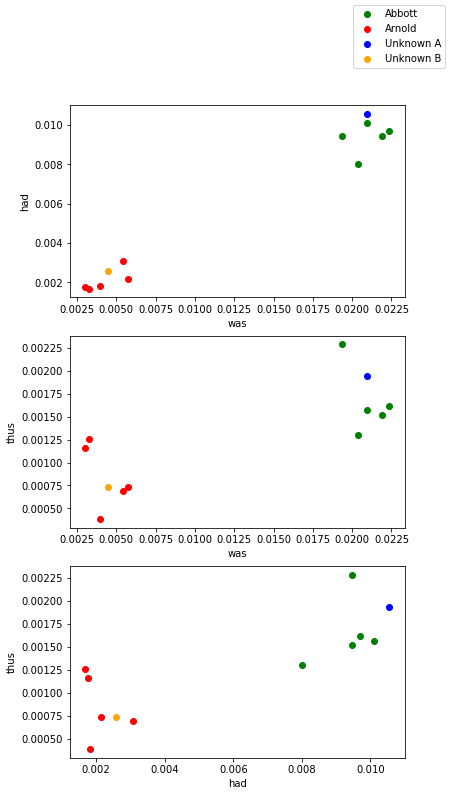

In [13]:
fig = plt.figure(figsize=(6,4*len(combs)))

axes = []

PT_SIZE = 1

for i in range(len(combs)):
    axes.append(fig.add_subplot(len(combs),1, i+1))
    axes[i].set_xlabel(combs[i][0])
    axes[i].set_ylabel(combs[i][1])
    axes[i].scatter(df_abbott[combs[i][0]], df_abbott[combs[i][1]], color='green')
    axes[i].scatter(df_arnold[combs[i][0]], df_arnold[combs[i][1]], color='red')
    axes[i].scatter(unknownA[combs[i][0]], unknownA[combs[i][1]], color='blue')
    axes[i].scatter(unknownB[combs[i][0]], unknownB[combs[i][1]], color='orange')

fig.legend(["Abbott","Arnold","Unknown A","Unknown B"])
fig.tight_layout

## 3D

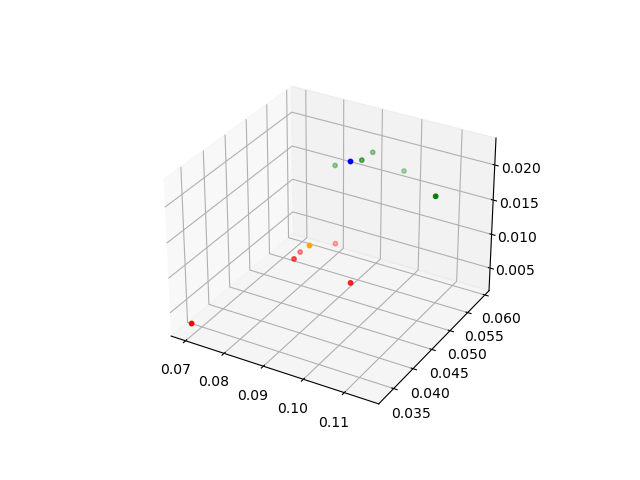

In [14]:
%matplotlib widget


PT_SIZE = 10

ax = plt.axes(projection='3d')

ax.scatter3D(df_abbott[cols[0]], df_abbott[cols[1]],df_abbott[cols[2]], s=PT_SIZE, color='green')
ax.scatter3D(df_arnold[cols[0]], df_arnold[cols[1]],df_arnold[cols[2]], s=PT_SIZE, color='red')
ax.scatter3D(unknownA[cols[0]], unknownA[cols[1]],unknownA[cols[2]], s=PT_SIZE, color='blue')
ax.scatter3D(unknownB[cols[0]], unknownB[cols[1]],unknownB[cols[2]], s=PT_SIZE, color='orange')



# KNN

## Test vs Training Data

In [15]:
training = df_comparison.iloc[0:4]
training = pd.concat([training,df_comparison.iloc[5:9]])

training

,the,and,was,his,that,her,which,with,for,had,...,world,certain,wholly,way,took,soon,country,years,same,man
Abbott,0.095246,0.053253,0.021928,0.017014,0.01382,0.012653,0.012612,0.010913,0.009684,0.009459,...,0.000983,0.000983,0.000962,0.000962,0.000962,0.000962,0.000962,0.000942,0.000942,0.000942
Abbott,0.101282,0.055193,0.019328,0.013128,0.013281,0.004464,0.01227,0.009345,0.010313,0.009455,...,0.000594,0.00099,0.000726,0.001187,0.000858,0.001143,0.001077,0.000902,0.000814,0.000616
Abbott,0.11495,0.048639,0.020937,0.01151,0.014516,0.001718,0.01166,0.008182,0.008031,0.010114,...,0.000472,0.000666,0.000537,0.001009,0.000601,0.000859,0.001589,0.000451,0.000966,0.000752
Abbott,0.095659,0.049994,0.022361,0.020282,0.015337,0.002251,0.010468,0.010872,0.009141,0.009699,...,0.000192,0.000943,0.000423,0.002021,0.001424,0.001597,0.002867,0.000866,0.000693,0.00102
Arnold,0.0695,0.033153,0.002998,0.012873,0.020143,0.000627,0.011423,0.009131,0.012011,0.001763,...,0.000549,0.000725,0.000118,0.000803,0.000098,0.000078,0.000059,0.000216,0.00145,0.001352
Arnold,0.079761,0.059324,0.003228,0.005912,0.01766,0.000188,0.013081,0.011092,0.012218,0.00167,...,0.001783,0.000525,0.000094,0.001727,0.000075,0.000188,0.000638,0.000507,0.001614,0.002571
Arnold,0.075728,0.053939,0.003953,0.011844,0.00925,0.006239,0.004586,0.011829,0.006563,0.001822,...,0.002517,0.000046,0.000124,0.001467,0.000587,0.000432,0.000293,0.000803,0.000185,0.002394
Arnold,0.09468,0.048299,0.005408,0.008364,0.012263,0.001761,0.008962,0.009842,0.010691,0.003082,...,0.001509,0.000975,0.000189,0.001415,0.000189,0.00022,0.000535,0.000503,0.000975,0.000912


In [16]:
test1 = df_comparison.iloc[4]
test2 = df_comparison.iloc[9]
test1

the        0.088572
and        0.050413
was        0.020362
his        0.018335
that       0.015897
             ...   
soon       0.002058
country     0.00038
years      0.000127
same       0.000348
man         0.00133
Name: Abbott, Length: 100, dtype: object

In [17]:
unknownA = df_comparison.iloc[10]
unknownB = df_comparison.iloc[11]
unknownB

the        0.076688
and        0.055266
was        0.004474
his        0.010264
that       0.018317
             ...   
soon       0.000211
country    0.000684
years      0.000632
same       0.000842
man        0.003527
Name: Unknown B Frequency, Length: 100, dtype: object

## K value

In [18]:
k = 5

## Distance
This function takes takes a data point and finds it's closest neighbors on the graph. This function takes "thus," "was," and "had" from the unknown authors and returns which author its frequency most resembles.

In [19]:
def d(p1, p2):
    z =zip(list(p1), list(p2))
    sqrs = map(lambda t: (t[0] - t[1]) **2, z)
    return np.sqrt(np.sum([*sqrs]))

In [20]:
d(pd.Series([0,0, 0]), pd.Series([0,4,3]))

5.0

In [21]:
unknown = test1
unknown.loc['the']


0.08857151904746825

In [22]:
def get_neighbor(u, n, i, select_cols, data_index):
    distance = d(u[select_cols], n[select_cols])
    return(distance, data_index, n[select_cols])

In [23]:
def knn_funct(data, target, k, select_cols):
    i = 0
    neighbors = []
    for idx in data.index:
        neighbors.append(get_neighbor(target, data.iloc[i], i, select_cols, data.index[i]))
        i += 1
    neighbors.sort()
    return neighbors[:k]

In [24]:
# Tests for Abbott
neighbors = knn_funct(training, test1, 5, select_cols)
votes = 0
# After neighbors our found, the algorithm counts the votes and makes the decision in a democratic fashion.
for i in range(len(neighbors)):
    if neighbors[i][1]=='Abbott':
        votes += 1
        
if votes>len(neighbors)/2:
    print("Belongs to Abbott")
else:
    print("Belongs to Arnold")

# The algorithm correctly to place Unknown A with Abbott

Belongs to Abbott


In [25]:
# Tests for Arnold
neighbors = knn_funct(training, test2, 5, select_cols)
votes = 0
for i in range(len(neighbors)):
    if neighbors[i][1]=='Abbott':
        votes += 1
        
if votes>len(neighbors)/2:
    print("Belongs to Abbott")
else:
    print("Belongs to Arnold")
# The algorithm correctly to place Unknown B with Abbott

Belongs to Arnold


In [26]:
neighbors = knn_funct(training, test1, 7, select_cols)
votes = 0
for i in range(len(neighbors)):
    if neighbors[i][1]=='Abbott':
        votes += 1
        
if votes>len(neighbors)/2:
    print("Belongs to Abbott")
else:
    print("Belongs to Arnold")
    


Belongs to Abbott


In [27]:
neighbors = knn_funct(training, test2, 7, select_cols)
votes = 0
for i in range(len(neighbors)):
    print(neighbors[i][1])
    if neighbors[i][1]=='Abbott':
        votes += 1
        
if votes>len(neighbors)/2:
    print("Belongs to Abbott")
else:
    print("Belongs to Arnold")


Arnold
Arnold
Arnold
Arnold
Abbott
Abbott
Abbott
Belongs to Arnold


In [28]:
analysis = df_comparison[0:10]
analysis

,the,and,was,his,that,her,which,with,for,had,...,world,certain,wholly,way,took,soon,country,years,same,man
Abbott,0.095246,0.053253,0.021928,0.017014,0.01382,0.012653,0.012612,0.010913,0.009684,0.009459,...,0.000983,0.000983,0.000962,0.000962,0.000962,0.000962,0.000962,0.000942,0.000942,0.000942
Abbott,0.101282,0.055193,0.019328,0.013128,0.013281,0.004464,0.01227,0.009345,0.010313,0.009455,...,0.000594,0.00099,0.000726,0.001187,0.000858,0.001143,0.001077,0.000902,0.000814,0.000616
Abbott,0.11495,0.048639,0.020937,0.01151,0.014516,0.001718,0.01166,0.008182,0.008031,0.010114,...,0.000472,0.000666,0.000537,0.001009,0.000601,0.000859,0.001589,0.000451,0.000966,0.000752
Abbott,0.095659,0.049994,0.022361,0.020282,0.015337,0.002251,0.010468,0.010872,0.009141,0.009699,...,0.000192,0.000943,0.000423,0.002021,0.001424,0.001597,0.002867,0.000866,0.000693,0.00102
Abbott,0.088572,0.050413,0.020362,0.018335,0.015897,0.002628,0.004687,0.006998,0.008582,0.008012,...,0.000127,0.000222,0.000158,0.002502,0.001583,0.002058,0.00038,0.000127,0.000348,0.00133
Arnold,0.0695,0.033153,0.002998,0.012873,0.020143,0.000627,0.011423,0.009131,0.012011,0.001763,...,0.000549,0.000725,0.000118,0.000803,0.000098,0.000078,0.000059,0.000216,0.00145,0.001352
Arnold,0.079761,0.059324,0.003228,0.005912,0.01766,0.000188,0.013081,0.011092,0.012218,0.00167,...,0.001783,0.000525,0.000094,0.001727,0.000075,0.000188,0.000638,0.000507,0.001614,0.002571
Arnold,0.075728,0.053939,0.003953,0.011844,0.00925,0.006239,0.004586,0.011829,0.006563,0.001822,...,0.002517,0.000046,0.000124,0.001467,0.000587,0.000432,0.000293,0.000803,0.000185,0.002394
Arnold,0.09468,0.048299,0.005408,0.008364,0.012263,0.001761,0.008962,0.009842,0.010691,0.003082,...,0.001509,0.000975,0.000189,0.001415,0.000189,0.00022,0.000535,0.000503,0.000975,0.000912
Arnold,0.078835,0.049409,0.005713,0.011252,0.014753,0.002177,0.011033,0.009847,0.011149,0.002154,...,0.002062,0.000599,0.000115,0.00114,0.00023,0.000207,0.000587,0.000806,0.001037,0.002522


# Algorithm Analysis
The algorithm has worked correctly. In both tests, the algorithm correctly stated that test 1 was an Abbott piece while test 2 was an Arnold piece. I believe that this this algorithm had an easier time working due to the strong difference in preferation of word choice as demonstrated in the analysis of dimension of analysis. 

# Set up algorithm for analysis

In [29]:
knn_unknownA5 = knn_funct(analysis, unknownA, 5, select_cols)
votes = 0
for i in range(len(knn_unknownA5)):
    print(knn_unknownA5[i][1])
    if knn_unknownA5[i][1]=='Abbott':
        votes += 1
        
if votes>len(knn_unknownA5)/2:
    print("Belongs to Abbott")
else:
    print("Belongs to Arnold")

Abbott
Abbott
Abbott
Abbott
Abbott
Belongs to Abbott


In [30]:
knn_unknownA7 = knn_funct(analysis, unknownA, 7, select_cols)
votes = 0
for i in range(len(knn_unknownA7)):
    print(knn_unknownA7[i][1])
    if knn_unknownA7[i][1]=='Abbott':
        votes += 1
        
if votes>len(knn_unknownA7)/2:
    print("Belongs to Abbott")
else:
    print("Belongs to Arnold")

Abbott
Abbott
Abbott
Abbott
Abbott
Arnold
Arnold
Belongs to Abbott


In [31]:
knn_unknownB5 = knn_funct(analysis, unknownB, 5, select_cols)
votes = 0
for i in range(len(knn_unknownB5)):
    print(knn_unknownB5[i][1])
    if knn_unknownB5[i][1]=='Abbott':
        votes += 1
        
if votes>len(knn_unknownB5)/2:
    print("Belongs to Abbott")
else:
    print("Belongs to Arnold")

Arnold
Arnold
Arnold
Arnold
Arnold
Belongs to Arnold


In [32]:
knn_unknownB7 = knn_funct(analysis, unknownB, 7, select_cols)
votes = 0
for i in range(len(knn_unknownB7)):
    print(knn_unknownB7[i][1])
    if knn_unknownB7[i][1]=='Abbott':
        votes += 1
        
if votes>len(knn_unknownB7)/2:
    print("Belongs to Abbott")
else:
    print("Belongs to Arnold")

Arnold
Arnold
Arnold
Arnold
Arnold
Abbott
Abbott
Belongs to Arnold


# Unknown A
Lines in green will be a vote for Abbott. Lines in red will be a vote for Arnold.

## Unknown A with 5 neighbors

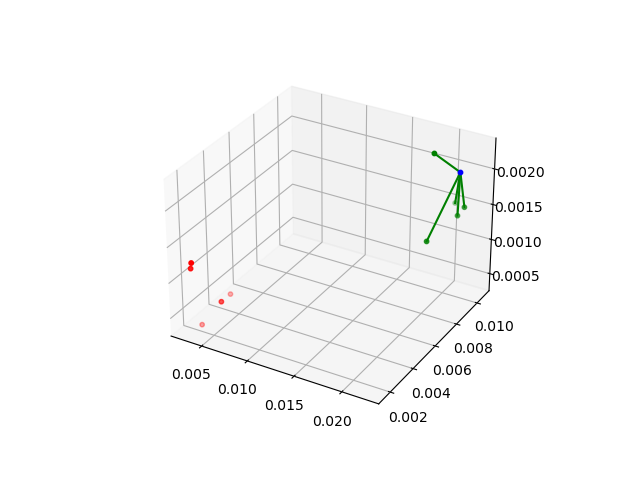

In [37]:

%matplotlib widget


PT_SIZE = 10

axunknownA5 = plt.axes(projection='3d')

axunknownA5.scatter3D(df_comparison[0:5][select_cols[0]], df_comparison[0:5][select_cols[1]] ,df_comparison[0:5][select_cols[2]], s=PT_SIZE, color='green')
axunknownA5.scatter3D(df_comparison[5:10][select_cols[0]], df_comparison[5:10][select_cols[1]] ,df_comparison[5:10][select_cols[2]], s=PT_SIZE, color='red')
axunknownA5.scatter3D(df_comparison[10:11][select_cols[0]], df_comparison[10:11][select_cols[1]] ,df_comparison[10:11][select_cols[2]], s=PT_SIZE, color='blue')


for i in knn_unknownA5:
    x = [i[2][select_cols[0]], df_comparison.loc['Unknown A Frequency', select_cols[0]]]
    y = [i[2][select_cols[1]], df_comparison.loc['Unknown A Frequency', select_cols[1]]]
    z = [i[2][select_cols[2]], df_comparison.loc['Unknown A Frequency', select_cols[2]]]
    if i[1] == 'Abbott': 
        axunknownA5.plot3D(x, y, z, color='green')
    else:
        axunknownA5.plot3D(x, y, z, color='red')

## Unknown A with 7 neighbors

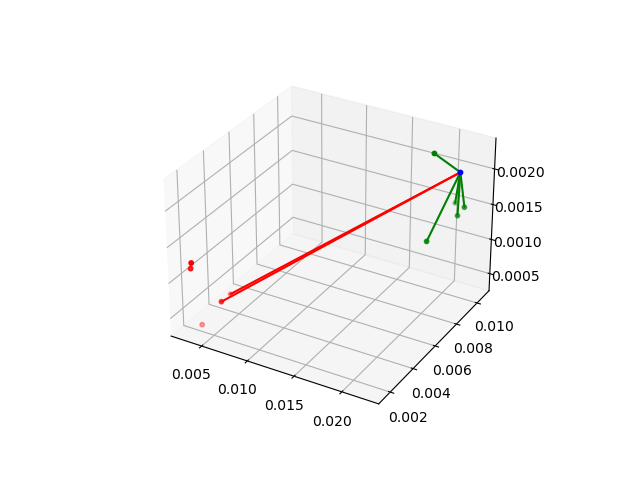

In [38]:

%matplotlib widget


PT_SIZE = 10

axunknownA7 = plt.axes(projection='3d')

axunknownA7.scatter3D(df_comparison[0:5][select_cols[0]], df_comparison[0:5][select_cols[1]] ,df_comparison[0:5][select_cols[2]], s=PT_SIZE, color='green')
axunknownA7.scatter3D(df_comparison[5:10][select_cols[0]], df_comparison[5:10][select_cols[1]] ,df_comparison[5:10][select_cols[2]], s=PT_SIZE, color='red')
axunknownA7.scatter3D(df_comparison[10:11][select_cols[0]], df_comparison[10:11][select_cols[1]] ,df_comparison[10:11][select_cols[2]], s=PT_SIZE, color='blue')


for i in knn_unknownA7:
    x = [i[2][select_cols[0]], df_comparison.loc['Unknown A Frequency', select_cols[0]]]
    y = [i[2][select_cols[1]], df_comparison.loc['Unknown A Frequency', select_cols[1]]]
    z = [i[2][select_cols[2]], df_comparison.loc['Unknown A Frequency', select_cols[2]]]
    if i[1] == 'Abbott': 
        axunknownA7.plot3D(x, y, z, color='green')
    else:
        axunknownA7.plot3D(x, y, z, color='red')
       
    


# Unknown B
Lines in green will be a vote for Abbott. Lines in red will be a vote for Arnold.

## Unknown B with 5 neighbors

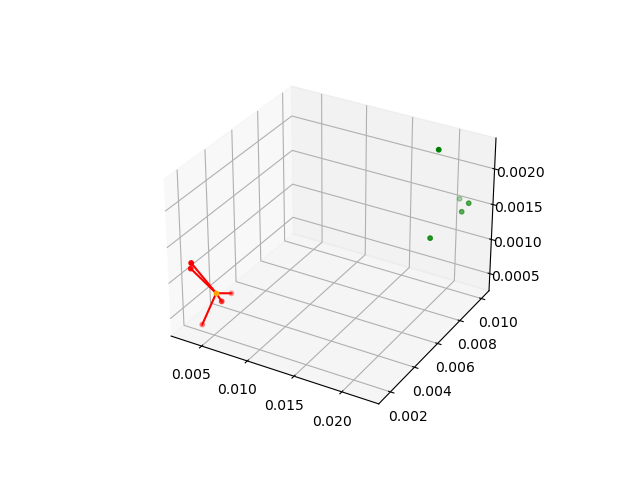

In [39]:
%matplotlib widget


PT_SIZE = 10

axunknownB5 = plt.axes(projection='3d')

axunknownB5.scatter3D(df_comparison[0:5][select_cols[0]], df_comparison[0:5][select_cols[1]] ,df_comparison[0:5][select_cols[2]], s=PT_SIZE, color='green')
axunknownB5.scatter3D(df_comparison[5:10][select_cols[0]], df_comparison[5:10][select_cols[1]] ,df_comparison[5:10][select_cols[2]], s=PT_SIZE, color='red')
axunknownB5.scatter3D(df_comparison[11:12][select_cols[0]], df_comparison[11:12][select_cols[1]] ,df_comparison[11:12][select_cols[2]], s=PT_SIZE, color='orange')


for i in knn_unknownB5:
    x = [i[2][select_cols[0]], df_comparison.loc['Unknown B Frequency', select_cols[0]]]
    y = [i[2][select_cols[1]], df_comparison.loc['Unknown B Frequency', select_cols[1]]]
    z = [i[2][select_cols[2]], df_comparison.loc['Unknown B Frequency', select_cols[2]]]
    if i[1] == 'Abbott': 
        axunknownB5.plot3D(x, y, z, color='green')
    else:
        axunknownB5.plot3D(x, y, z, color='red')

## Unknown B with 7 neighbors

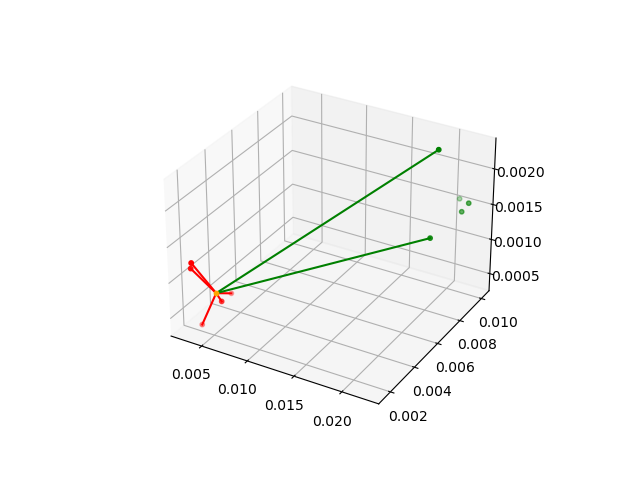

In [36]:
%matplotlib widget


PT_SIZE = 10

axunknownB7 = plt.axes(projection='3d')

axunknownB7.scatter3D(df_comparison[0:5][select_cols[0]], df_comparison[0:5][select_cols[1]] ,df_comparison[0:5][select_cols[2]], s=PT_SIZE, color='green')
axunknownB7.scatter3D(df_comparison[5:10][select_cols[0]], df_comparison[5:10][select_cols[1]] ,df_comparison[5:10][select_cols[2]], s=PT_SIZE, color='red')
axunknownB7.scatter3D(df_comparison[11:12][select_cols[0]], df_comparison[11:12][select_cols[1]] ,df_comparison[11:12][select_cols[2]], s=PT_SIZE, color='orange')


for i in knn_unknownB7:
    x = [i[2][select_cols[0]], df_comparison.loc['Unknown B Frequency', select_cols[0]]]
    y = [i[2][select_cols[1]], df_comparison.loc['Unknown B Frequency', select_cols[1]]]
    z = [i[2][select_cols[2]], df_comparison.loc['Unknown B Frequency', select_cols[2]]]
    if i[1] == 'Abbott': 
        axunknownB7.plot3D(x, y, z, color='green')
    else:
        axunknownB7.plot3D(x, y, z, color='red')

# Algorithm Analysis
The algorithm has worked correctly. In both tests, the algorithm correctly stated that Unknown A was an Abbott piece while Unknown B was an Arnold piece. I believe that this this algorithm had an easier time working due to the strong difference in preferation of word choice as demonstrated in the analysis of dimension of analysis.